# Linear Regression on Boston Housing Dataset

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [12]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

**Read data from file csv
or Load the Boston Housing DataSet from scikit-learn**

In [14]:
df = pd.read_csv("BostonHousing.csv", sep=",", header = 0, index_col = None)
df.head()  # first 5 rows

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
# or load data from from scikit-learn
from sklearn.datasets import load_boston
boston_dataset = load_boston()
# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()
#Load the data into pandas dataframe
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# The target values is missing from the data. Create a new column of target values and add it to dataframe
boston['MEDV'] = boston_dataset.target
(boston.head()) # first 5 rows

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


**Data preprocessing**

In [15]:
# check for missing values in all the columns
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [17]:
# Dimension of the dataset
print(np.shape(df))

(506, 14)


In [18]:
# Let's summarize the data to see the distribution of data
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Truy cập theo slice index: Theo cách này chúng ta chỉ cần truyền vào index của dòng và cột và sử dụng hàm df.iloc[rows_slice, columns_slice] để trích xuất ra các dòng và cột tương ứng. Cách lấy slice cho rows và columns hoàn toàn tương tự như truy cập slice index trong list.

In [20]:
# Lựa chọn 5 dòng đầu và 5 cột đầu của df
df.iloc[:5, :5]

,crim,zn,indus,chas,nox
0,0.00632,18.0,2.31,0,0.538
1,0.02731,0.0,7.07,0,0.469
2,0.02729,0.0,7.07,0,0.469
3,0.03237,0.0,2.18,0,0.458
4,0.06905,0.0,2.18,0,0.458


In [21]:
# Lựa chọn 5 dòng từ 5:10 và 2 cột từ 2:4
df.iloc[5:10, 2:4]

,indus,chas
5,2.18,0
6,7.87,0
7,7.87,0
8,7.87,0
9,7.87,0


Truy cập các dòng theo row index của dataframe thông qua câu lệnh df.loc[].



In [22]:
# Truy cập các dòng có index là 10:15
df.loc[10:15]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
14,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9


Truy cập theo column names: Đây là cách được sử dụng phổ biến vì nó tường minh hơn. Theo cách này chúng ta sẽ truy cập các trường của dataframe bằng cách khai báo list column_names của chúng.

Ví dụ bên dưới chúng ta cần lấy ra các trường ['crim', 'tax', 'rad'] từ bảng df.

In [23]:
df[['crim', 'tax', 'rad']]

,crim,tax,rad
0,0.00632,296,1
1,0.02731,242,2
2,0.02729,242,2
3,0.03237,222,3
4,0.06905,222,3
...,...,...,...
501,0.06263,273,1
502,0.04527,273,1
503,0.06076,273,1
504,0.10959,273,1


Kết hợp cả hai cách: Chúng ta có thể truy cập dataframe bằng cách kết hợp cả hai cách theo hướng sử dụng column names đối với cột và slice index đối với dòng

In [24]:
# Lấy ra các dòng từ 10:15 của các trường 'crim', 'tax', 'rad'
df[['crim', 'tax', 'rad']].iloc[10:15]

,crim,tax,rad
10,0.22489,311,5
11,0.11747,311,5
12,0.09378,311,5
13,0.62976,307,4
14,0.63796,307,4


**Lọc dataframe**

In [25]:
#Giả sử chúng ta muốn lọc ra các thị trấn mà có số phòng ở trung bình trên căn hộ là trên 7
df[df['rm'] > 7]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,3.47428,0.0,18.10,1,0.7180,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9
370,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
375,19.60910,0.0,18.10,0,0.6710,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
453,8.24809,0.0,18.10,0,0.7130,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8


In [ ]:
# Muốn lọc thêm điều kiện thuế suất trên 250 ngoài điều kiện số phòng thì ta làm như sau
df[(df['rm']>7) & (df['tax']>250)].head()

Ta dùng hàm df.select_dtypes() để lọc các cột theo định dạng dữ liệu. Những định dạng chính bao gồm integer, float, object, boolean. 

In [26]:
# lọc các trường có định dạng dữ liệu là float.
df.select_dtypes('float').head()

,crim,zn,indus,nox,rm,age,dis,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,36.2


Min, max, mean, meadian, sum

In [31]:
print(df['tax'].min(), df['tax'].max(), df['tax'].mean(), df['tax'].median(), df['tax'].sum())

187 711 408.2371541501976 330.0 206568


In [29]:
#Sort data
df.sort_values('medv', ascending = False)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
369,5.66998,0.0,18.1,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
372,8.26725,0.0,18.1,1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0
371,9.23230,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
370,6.53876,0.0,18.1,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
368,4.89822,0.0,18.1,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,45.74610,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
399,9.91655,0.0,18.1,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3
400,25.04610,0.0,18.1,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
398,38.35180,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0


In [ ]:
df.sort_values(['medv', 'tax'], ascending = False).head()

**Thống kê theo nhóm**

In [ ]:
df.groupby(['chas']).sum()

In [ ]:
df.groupby(['chas']).mean()
# or 
df.groupby(['chas']).apply(lambda x: np.mean(x))

**Data Visualization**

In [ ]:
#box plot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(df['medv'], bins=50)
plt.show()

**Correlation matrix**

In [ ]:
# compute the pair wise correlation for all columns  
correlation_matrix = df.corr().round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

**Observations**
*   From the above coorelation plot we can see that **MEDV** is strongly correlated to **LSTAT**, **RM**

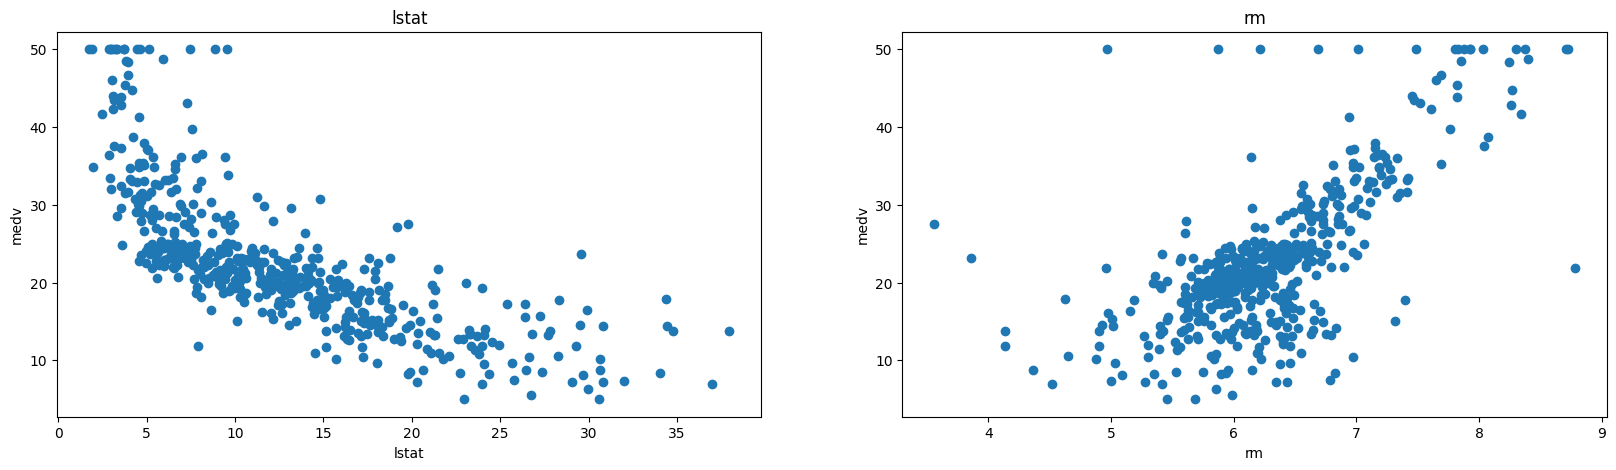

In [32]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = df['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

C:\Users\tanda\AppData\Local\Temp\ipykernel_11424\4050624376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\tanda\AppData\Local\Temp\ipykernel_11424\4050624376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\tanda\AppData\Local\Temp\

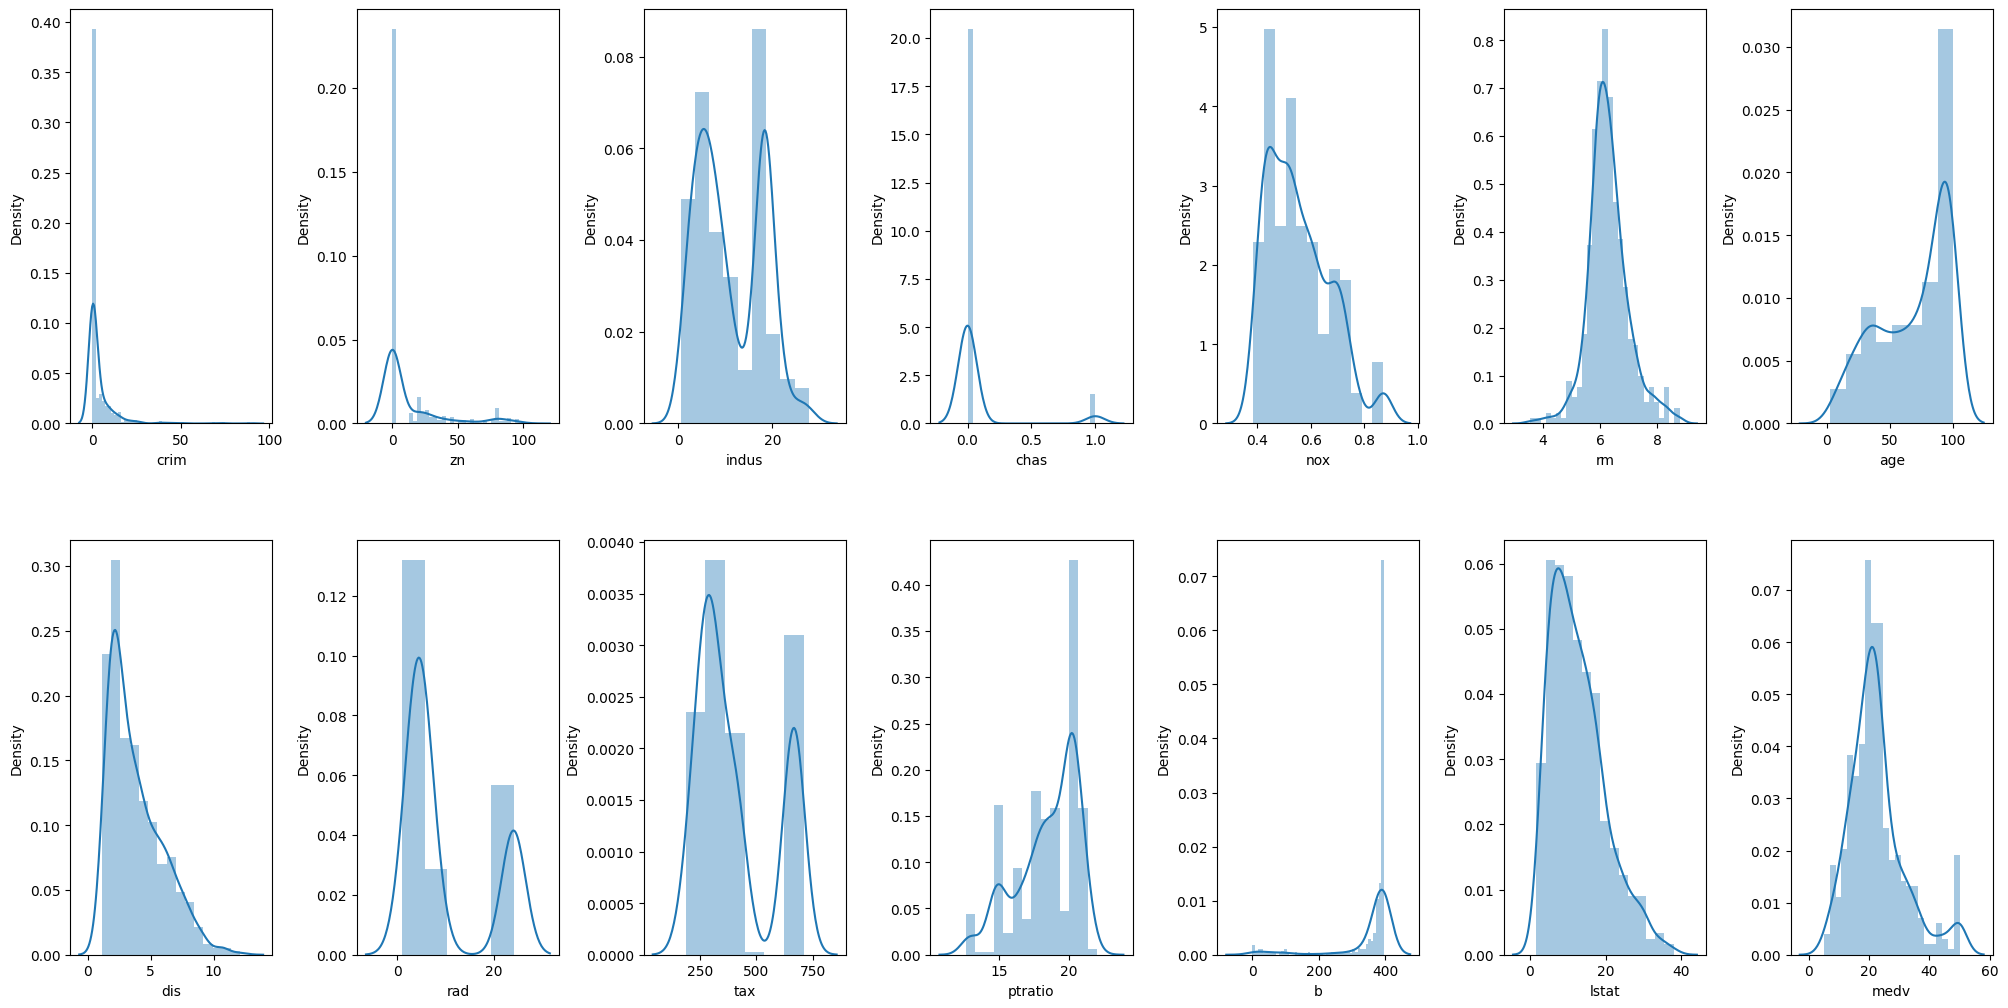

In [33]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)